In [1]:
import numpy as np
from numpy import sin, cos, exp, pi
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.widgets import Slider
import ipywidgets as widgets

In [2]:
plt.style.use('dark_background')
plt.rcParams['figure.facecolor'] = 'None'
plt.rcParams['axes.facecolor'] = 'None'
plt.rcParams['figure.edgecolor'] = 'None'
plt.rcParams['axes.edgecolor'] = 'None'

### Here we explore the Fourier Transform
(as inspired by 3B1B: https://www.3blue1brown.com/lessons/fourier-transforms)

First we build a waveform, here it is done with two sine waves of two different frequencies

$f(t)=sin(2\pi tf_1)+sin(2\pi tf_2)$

Where $f_1$ and $f_2$ correspond to hz1 and hz2

Then we define a frequency range with which to calculate the $FT$, here Hz

$F(f)=\int{f(t)e^{i2\pi ft} dt}$

* note that the code taks the mean for visualization, whereas the true $FT$ does not

We can then extract the real and imaginary components form $FT$

* These correspond to the even and odd (cos and sin) eigenstates

In [3]:
hz1, hz2 = 2.1, 7.6
t = np.linspace(0,1,1000)
f = sin(2*pi*t*hz1) + sin(2*pi*t*hz2)
Hz = np.linspace(0,10,100)
means = [np.mean((f*exp(1j*2*pi*hz*t))) for hz in Hz]
Re = np.array([m.real for m in means])
Im = np.array([m.imag for m in means])

In [4]:
def plotFT(hz):

    z = f*exp(1j*2*pi*hz*t)
    x = [i.real for i in z]
    y = [i.imag for i in z]
    
    mx = np.mean(x)
    my = np.mean(y)
    r = np.sqrt(mx**2+my**2)

    fig = plt.figure(figsize=(8, 4))
    gs = gridspec.GridSpec(2, 2)
    
    a1 = fig.add_subplot(gs[:, 0])
    a2 = fig.add_subplot(gs[0, 1])
    a3 = fig.add_subplot(gs[1, 1])
    
    a1.plot(x, y, c='magenta', zorder=1)
    a1.scatter([mx], [my], c='w', label=str(np.round(r,3)), zorder=2)
    a1.legend(loc='upper left')
    a1.grid(ls=':')
    a1.set_xlim(-2, 2)
    a1.set_ylim(-2, 2)
    a1.set_xticks([])
    a1.set_yticks([])
    
    a2.plot(t, f, c='yellow')
    a2.set_yticks([])

    a3.plot(Hz, Re, c='r', alpha=0.5, zorder=1)
    a3.scatter(hz, [mx], c='r', label='Re', zorder=2)
    a3.plot(Hz, Im, c='b', alpha=0.5, zorder=1)
    a3.scatter(hz, [my], c='b', label='Im', zorder=2)
    a3.legend(loc='lower center')
    a3.set_xlim(0,10)
    a3.set_ylim(-1,1)
    a3.set_yticks([])
    plt.tight_layout()
    plt.show()

In [5]:
slider = widgets.FloatSlider(value=0, min=0, max=Hz[-1], step=0.1, description='hz')
widgets.interactive(plotFT, hz=slider)

interactive(children=(FloatSlider(value=0.0, description='hz', max=10.0), Output()), _dom_classes=('widget-int…

### So what's going on here?

As much as we love 3B1B, the complex plane representation, albiet attractive, does not do much for our intuitions -- indeed, making the polar plot is not at all necessary. What we notice if anything, is that when the sampled frequency aligns with one of the eigenfrequencies, the loops coalesce either vertically (imaginary, odd frequency), or horizontally (real, even frequency). And that otherwise these loops tend to be more or less evenly distributed about the domain. These moments of *constructive interference*, if we can jump the gun, likewise shift the mean away from the origin, suggesting the overall value of $F(f)$ has, at that value of $f$, become mostly real or mostly imaginary -- this is why both the heighest peaks in the requency plot are blue (imaginary), since the eigenfrequencies are initialized as odd (sine).

### Looking further

In search of more intuition, we now investigate the same idea, just without the polar plot -- i.e., we will plot the mean of $F(f)$ over the time domain, along with the original signal.

For clarity, we plot only the imaginary component, since again, the eigenfrequencies are initialized as sine waves. This can be done just by multiplying $f(t)$ by $sin(2\pi ft)$, instead of the complex polar form $e^{i2\pi ft}$.

In [6]:
def update(hz): 
    e = sin(2*pi*hz*t)
    y = f*sin(2*pi*hz*t)
    my = np.mean(y)
    plt.figure(figsize=(8,2))
    plt.hlines(0, 0, t[-1], color='w', alpha=0.2)
    plt.plot(t, f, c='yellow', alpha=0.5, label='$f(t)$')
    plt.plot(t, e, c='b', alpha=0.5, label='$sin(2\pi ft)$')
    plt.plot(t, y, c='magenta', alpha=0.5, label='$f(t)sin(2\pi ft)$')
    plt.hlines(my, 0, 1, color='magenta', ls=':', label=str(np.round(my,1)))
    plt.legend(bbox_to_anchor=(1, 0.9))
    plt.yticks([])
    plt.ylim(-2,2)

In [7]:
widgets.interactive(update, hz=slider)

interactive(children=(FloatSlider(value=0.0, description='hz', max=10.0), Output()), _dom_classes=('widget-int…

Play with this as you like. What we notice is that where the sample frequencies align with the eigenfrequencies, the mean of their product departs from zero as before. However, now that we are simultaneously plotting the original signal as well, we realize that indeed, it is the point of most constructive interference (resonance) between the original signal $f(t)$ and the sampled frequency $sin(2\pi ft)$ that leads to an overall positive mean in their product $f(t)sin(2\pi ft)$. 

Basically, if your sample frequency has the *same sign* as the original signal, for a majority of the time, then your product will be mostly positive.

Try simplifying the original signal to make this even more clear.

Thus, the general idea behind the $FT$ can be seen to be to test (multiply) all sample frequencies $e^{i2\pi ft}$ against the original signal $f(t)$, such that all but those which resonate with the original signal's eigenfrequencies will cancel out. 

### Now we test an actual FT algorithm
Namely, Scipy's FFT

peaks: [1.998 7.992]


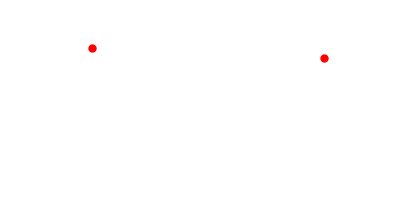

In [8]:
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks

F = fft(f)
fs = 1/(t[1]-t[0])
freqs = fftfreq(len(t), 1/fs)

mag = np.abs(F)/len(t)
peaks = find_peaks(mag)[0]
peaks = peaks[freqs[peaks] > 0]
print("peaks:", freqs[peaks])

plt.figure(figsize=(5,2))
plt.plot(mag, c='w')
plt.plot(freqs[peaks], mag[peaks], 'o', c='r', ms=5)
plt.yticks([])
plt.ylim(-1,1)
plt.xlim(0, Hz[-1])
plt.show()

These values should approximate the frequencies defined above

In [9]:
#//END